## Data Scientist - Project 1
### In this code workbook we want to find factors that have an influence on salary among software developers
#### No payment disparity for professional developers? Not so fast!

In order to analyze payment disparities among software developers we use the data coming from the 2017 stackoverflow survey

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

The dataset contains a lot of information. For our analysis we focus in the results of the survey with regard to:
Country, Professional, FormalEducation, HomeRemote, EmploymentStatus, CompanySize, Gender and Salary

In [9]:
df = df[["Country", "Professional", "FormalEducation","HomeRemote","EmploymentStatus", "CompanySize", "Gender", "Salary"]]

num_rows = df.shape[0] #Provide the number of rows in the dataset
print(str("The dataset contains information about ") + str(num_rows) + str(" persons"))

The dataset contains information about 51392 persons


### 1. Business and Data Understanding

We can see that almost every fourth individual currently lives in the United States. Second place India only contributes with around 10% to the survey

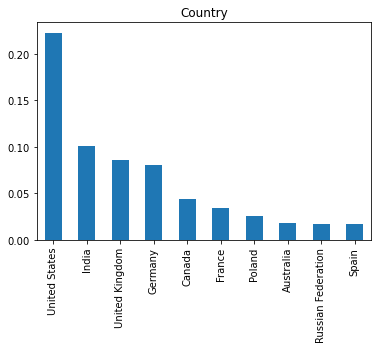

In [10]:
country_num = df.Country.value_counts()

# The below shows a bar chart of the proportion of the top 10 countries for the individuals.

(country_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

Unsuprisingly most of the individuals are Professional Developer or students, as expected in a stackoverflow survey.

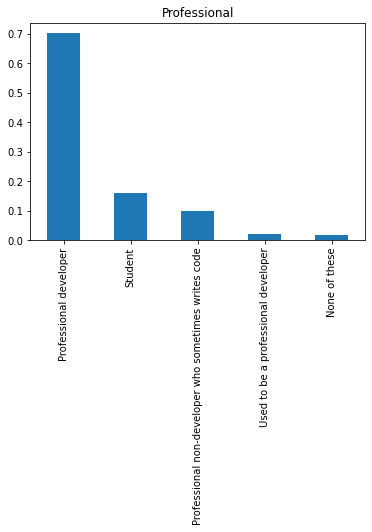

In [11]:
professional_num = df.Professional.value_counts()

(professional_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("Professional");

Also most of the individuals completed some kind of university degree such as bachelors oder masters.

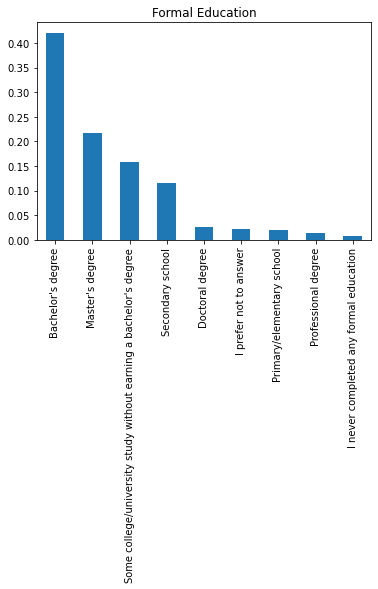

In [12]:
education_num = df.FormalEducation.value_counts()

(education_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

Since most of the individuals are professional developers we want to take a closer look towards the company size of their current employer

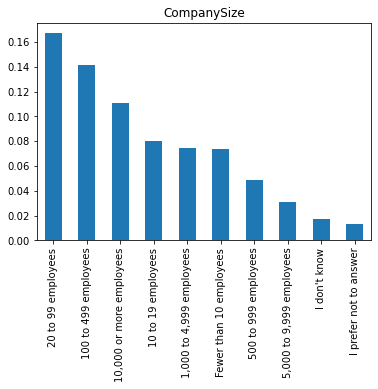

In [13]:
company_num = df.CompanySize.value_counts()

(company_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("CompanySize");

Before turning towards data preparation we also want to check the distribution of gender in the survey

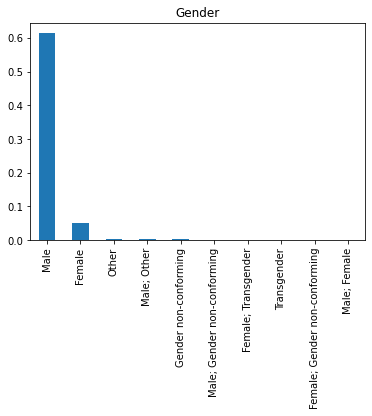

In [14]:
gender_num = df.Gender.value_counts()

(gender_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("Gender");

### 2 Data Preparation


As seen in the plots above there is some work left to prepare the data before jumping into the modeling process. For example not every person wanted to answer or did not know the company size they are currently employed at. Also for the gender there are not just the binary types of male and female, but also a lot of different types of other genders.
Besides that we also want to check how many NAs we have in our dataset

In [15]:
# how many null in columns:
print(str("In the column Country, the number of NAs is: " ) + str(df["Country"].isna().sum()))
print(str("In the column Professional, the number of NAs is: " ) + str(df["Professional"].isna().sum()))
print(str("In the column FormalEducation, the number of NAs is: " ) + str(df["FormalEducation"].isna().sum()))
print(str("In the column HomeRemote, the number of NAs is: " ) + str(df["HomeRemote"].isna().sum()))
print(str("In the column CompanySize, the number of NAs is: " ) + str(df["CompanySize"].isna().sum()))
print(str("In the column Gender, the number of NAs is: " ) + str(df["Gender"].isna().sum()))
print(str("In the column Salary, the number of NAs is: " ) + str(df["Salary"].isna().sum()))



In the column Country, the number of NAs is: 0
In the column Professional, the number of NAs is: 0
In the column FormalEducation, the number of NAs is: 0
In the column HomeRemote, the number of NAs is: 7384
In the column CompanySize, the number of NAs is: 12470
In the column Gender, the number of NAs is: 16345
In the column Salary, the number of NAs is: 38501


Unfortunately almost 75% of the individuals did not answer the question about their salary. Either because they might not have a salary, as a student for example, or simply because they did not want to give the information

In [16]:
df = df.dropna()
num_rows = df.shape[0] 
print(num_rows)

11696


After cleaning up the data for missing values we are left with around 20% of the initial data. In a second step we  want to further clean up and cluster the data. For example we want to refer only to small, medium or big companies or only male and female gender information. Since we only want to examine the salary of professional developers we exclude students etc. from the analysis. Fortunately the latter one has already been achieved by sorting out NAs.

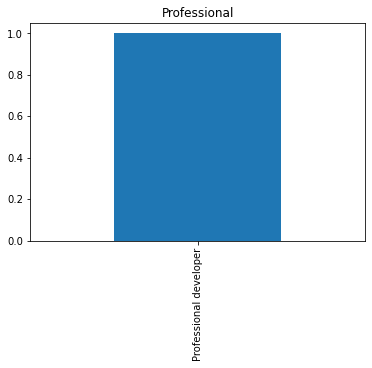

In [17]:
professional_num = df.Professional.value_counts()

(professional_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("Professional");

CompanySize:

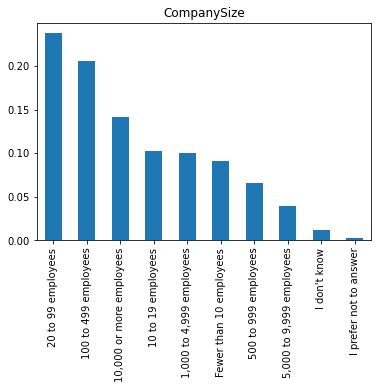

In [18]:
company_num = df.CompanySize.value_counts()

(company_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("CompanySize");

In [19]:
def companySize_num(inp):
    '''
    INPUT
        inp - a string of one of the values from the CompanySize column
    
    OUTPUT
        return 0 if the string is  in ("Fewer than 10 employees", "10 to 19 employees", "20 to 99 employees") - small businesses
        return 1 if the string is  in ("100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees") - medium businesses
        return 2 if the string is  in ("5,000 to 9,999 employees", "10,000 or more employees") - large businesses
        return 3 otherwise
    
    '''
    if inp  in ("Fewer than 10 employees", "10 to 19 employees", "20 to 99 employees"):
        return 0
    elif inp  in ("100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees"):
        return 1
    elif inp  in ("5,000 to 9,999 employees", "10,000 or more employees"):
        return 2
    else:
        return 3


df["CompanySize_num"] = df["CompanySize"].apply(companySize_num)
# We want to focus only on small, medium and large businesses
df = df[df['CompanySize_num'] < 3]

In [20]:
def companySize_sml(inp):
    '''
    INPUT
        inp - a string of one of the values from the CompanySize column
    
    OUTPUT
        return "small" if the string is  in ("Fewer than 10 employees", "10 to 19 employees", "20 to 99 employees") - small businesses
        return "medium" if the string is  in ("100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees") - medium businesses
        return "large" if the string is  in ("5,000 to 9,999 employees", "10,000 or more employees") - large businesses
        return 3 otherwise
    
    '''
    if inp  in ("Fewer than 10 employees", "10 to 19 employees", "20 to 99 employees"):
        return "small"
    elif inp  in ("100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees"):
        return "medium"
    elif inp  in ("5,000 to 9,999 employees", "10,000 or more employees"):
        return "large"
    else:
        return 3


df["CompanySize_sml"] = df["CompanySize"].apply(companySize_sml)


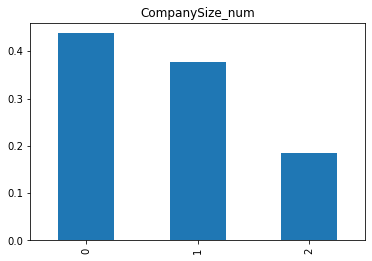

In [21]:
company_num = df.CompanySize_num.value_counts()

(company_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("CompanySize_num");

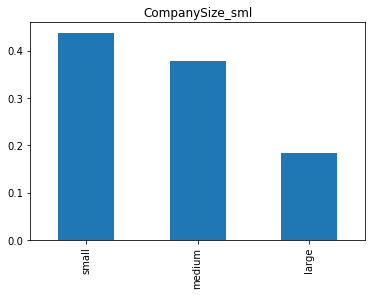

In [22]:
company_sml = df.CompanySize_sml.value_counts()

(company_sml[:10]/df.shape[0]).plot(kind="bar");
plt.title("CompanySize_sml");

Gender:

In [23]:
def gender_num(inp):
    '''
    INPUT
        inp - a string of one of the values from the CompanySize column
    
    OUTPUT
        return 0 if the string is  female
        return 1 if the string is  male
        return 2 otherwise
    
    '''
    if inp  in ("Female"):
        return 0
    elif inp  in ("Male"):
        return 1
    else:
        return 2


df["Gender_num"] = df["Gender"].apply(gender_num)
# We want to focus only on male and female data
df = df[df['Gender_num'] < 2]

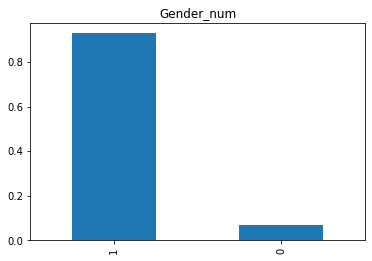

In [24]:
gender_num = df.Gender_num.value_counts()

(gender_num[:10]/df.shape[0]).plot(kind="bar");
plt.title("Gender_num");

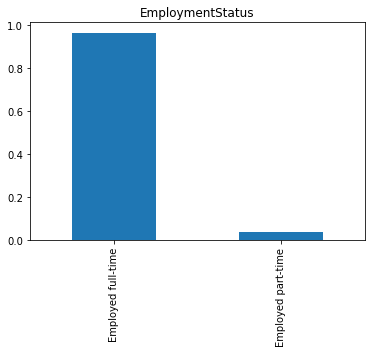

In [25]:
emp_vals = df.EmploymentStatus.value_counts()

(emp_vals/df.shape[0]).plot(kind="bar");
plt.title("EmploymentStatus");

In [26]:
# Focus on full time employees, for salary comparisons
df = df[df['EmploymentStatus'] == "Employed full-time"]

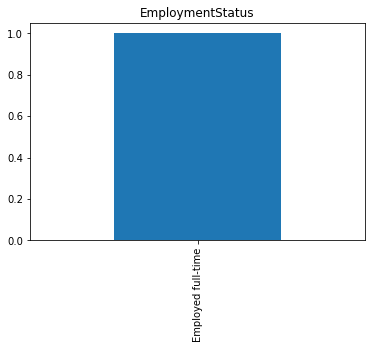

In [27]:
emp_vals = df.EmploymentStatus.value_counts()

(emp_vals/df.shape[0]).plot(kind="bar");
plt.title("EmploymentStatus");

Furthermore we want to binary encode if a person lives currently in the USA and if the person has a higher education such as a bachelors or masters degree

In [28]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Professional degree"):
        return 1
    else:
        return 0


df['HigherEd'] = df["FormalEducation"].apply(higher_ed)

In [29]:
def country_usa(inp):
    '''
    INPUT
        inp - a string of one of the values from the Country column
    
    OUTPUT
        return 1 if the string is  in ("United States")
        return 0 otherwise
    
    '''
    if inp in ("United States"):
        return 1
    else:
        return 0


df['USA'] = df["Country"].apply(country_usa)

In [30]:
num_rows = df.shape[0] 
print(num_rows)

10899


In [31]:
df['Count'] = 1 #In order to count number of entries later

### 3. Modeling and Evaluation

After cleaning the data we have 10899 rows of data left

#### Question 1: Do professional developer earn more money in the USA?

In [32]:
pd.pivot_table(df, values='Salary', index=['USA'],
                     aggfunc=np.mean)

,Salary
USA,
0,41379.931100
1,97429.638371


#### Answer 1: Yes, if working as professional developer the salaries in the USA are significantly higher

Text(0.5, 1.0, 'Average Annual Salary')

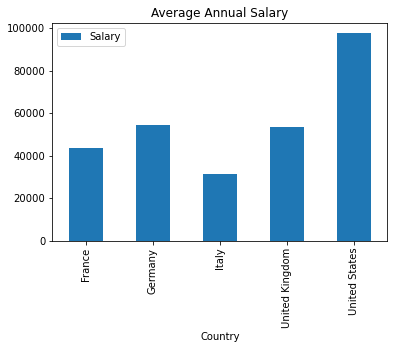

In [33]:
#plt.figure(figsize=(13,6))
pd.set_option('display.max_rows', None)
df2 = df[df['Country'].isin(["United States", "Germany", "France", "United Kingdom", "Italy"])]
df2 = pd.pivot_table(df2, values='Salary', index=['Country'],
                     aggfunc=np.mean, sort = True).plot(kind="bar");

plt.title("Average Annual Salary")


#### Question 2: Are bigger companies paying more money than small companies?

Text(0.5, 1.0, 'Average Annual Salary')

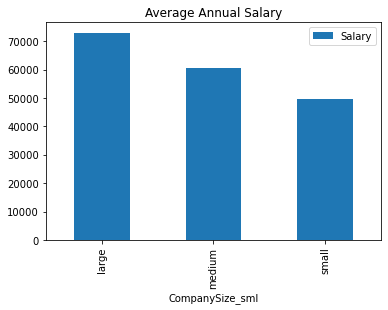

In [34]:
df3 = pd.pivot_table(df, values='Salary', index=['CompanySize_sml'],
                     aggfunc=np.mean).plot(kind="bar");
plt.title("Average Annual Salary")

#### Answer 2: Yes. Around the globe bigger companies pay higher salaries for professional developers than smaller companies.

#### Question 3: Is there any payment disparity in for professional programmers?

In [35]:
pd.pivot_table(df, values='Salary', index=['Gender'], aggfunc=np.mean)

,Salary
Gender,
Female,59452.676810
Male,58150.557404


At first glance there seems to be no noticeable difference in salaries between men and women. Having a closer look at the country information shows, that in relative terms more women are working in the USA, that pay higher salaries.

In [36]:
pd.pivot_table(df, values='Count', index=['USA'],
                    columns=['Gender'], aggfunc=np.sum)

Gender,Female,Male
USA,,
0,438,7182
1,333,2946


Where outside of the US for each female professional developer there are on average more than 16 male developers, in the US the ratio is only around 1:8.

In [37]:
pd.pivot_table(df, values='Salary', index=['USA', "CompanySize_sml"],
                    columns=['Gender'], aggfunc=np.mean)

Gender                      Female           Male
USA CompanySize_sml                              
0   large             38670.870227   47804.700097
    medium            39087.478200   43584.574060
    small             32067.372296   38339.775338
1   large            101514.984615  105990.598078
    medium            94080.805556   99171.972579
    small             81708.911290   90198.551255

#### Answer 3: Considering the company size as well, we can see that the major driver for salary in the sample is company size and location in the US. The table above shows, that not only bigger companies and the USA pay more in total, but also that women earn less than their male counterparts across the board

### THE END